## Class exercise
#### Create a small program that can get whether data from Aarhus
You must first register an account on https://openweathermap.org/ and generate an api key (at the tab by the same name)

In [3]:
import json
import requests


url = "http://api.openweathermap.org/data/2.5/forecast"
query = {'q': 'Aarhus,dk', 
         'mode': 'json',                       
         'units': 'metric',
         'appid': '73fdc10d51adf5c5ef1ff7857f89dea7'}
r = requests.get(url, params=query)

r.json()

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1646751600,
   'main': {'temp': 6.99,
    'feels_like': 6.99,
    'temp_min': 6.99,
    'temp_max': 8.12,
    'pressure': 1025,
    'sea_level': 1025,
    'grnd_level': 1024,
    'humidity': 61,
    'temp_kf': -1.13},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 3},
   'wind': {'speed': 0.74, 'deg': 223, 'gust': 1.31},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2022-03-08 15:00:00'},
  {'dt': 1646762400,
   'main': {'temp': 5.25,
    'feels_like': 5.25,
    'temp_min': 4.67,
    'temp_max': 5.25,
    'pressure': 1025,
    'sea_level': 1025,
    'grnd_level': 1024,
    'humidity': 65,
    'temp_kf': 0.58},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 5},
   'wind': {'speed': 0.76, 'deg': 160, 'gust': 0.96},
   'visibility': 10000,
   'pop':

## Exercise create generator
Create a generator function that can take a list of names as parameter and return each name. 
Get approved unisex names here: 

`wget -O unisex_navne.xls https://ast.dk/_namesdb/export/names?format=xls&gendermask=4`

In [37]:
import pandas as pd
uni_names = pd.read_excel('./unisex_navne.xls', header=None).iloc[:,0].tolist()

def generator(names):
  index = 0
  while index < len(names):
    yield names[index]
    index += 1

names_gen = generator(uni_names)
print(next(names_gen))
print(next(names_gen))
print(next(names_gen))
print(next(names_gen))

Abel
Abiola
Acelya
Ada


# Handin Exercise 6

Create a module containing a class: TextComparer with the following methods:
1. `__init__(self, url_list)`
2. `download(url,filename)` that stores the file on disk and raises NotFoundException when url returns 404
3. `multi_download()` uses threads to download multiple urls as text and stores filenames on a property of the TextComparer class object (Hint: use the download() method and create the filenames from the url or from the response object)
4. `__iter__()` returns an iterator
5. `__next__()` returns the next filename (and stops when there are no more)
6. `urllist_generator()` returns a generator to loop through the urls
7. `avg_vowels(text)` - a rough estimate on readability returns average number of vowels in the words of the text
8. `hardest_read()` reads all text from files in `filenames` and returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

https://www.gutenberg.org/files/84/84-0.txt
https://www.gutenberg.org/files/1342/1342-0.txt
------------------
https://www.gutenberg.org/files/84/84-0.txt
https://www.gutenberg.org/files/1342/1342-0.txt
------------------


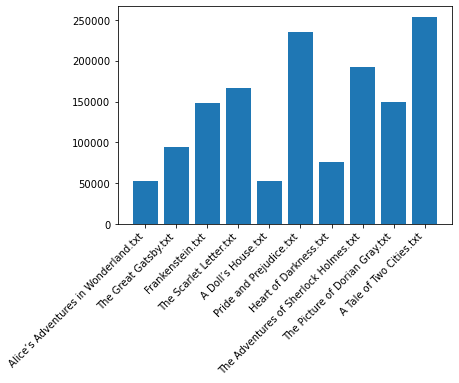

In [119]:
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import matplotlib.pyplot as plt
import requests

class TextComparer():
  
  def __init__(self,url_list):
    self.url_list = url_list
    self.file_list = list()
  
  def __iter__(self):
    self.index = -1
    return self
  
  def __next__(self):
    while self.index < len(self.url_list):
      self.index += 1
      return self.url_list[self.index]
    
  def download(self,url):
    r = requests.get(url)
    if(r.status_code == 400):
      raise FileNotFoundError
    for item in r.content.decode('utf-8').split("\n"):
      if "Title:" in item:
        filename = item.strip()[7:] + '.txt'
        self.file_list.append(filename)
        break
    with open(filename, 'w') as f:
      f.write(r.content.decode('utf-8'))
  
  def multi_download(self,):
    with ThreadPoolExecutor(5) as ex:
        ex.map(self.download, self.url_list)
  
  def urllist_generator(self):
    index = 0
    while index < len(self.url_list):
      yield self.url_list[index]
      index += 1
  
  def vowel_calc(self,file):
    vowels = ['A','E','I','O','U','W','Y','a','e','i','o','u','w','y']
    with open(file,'r') as f:
      text = f.read()
      score = 0
      for i in text:
        if i in vowels: 
          score += 1
    return score
  
  def hardest_read(self):
    files = self.file_list
    with ProcessPoolExecutor(multiprocessing.cpu_count()) as ex:
        res = ex.map(self.vowel_calc, files)
    return list(res)
        

textComparer = TextComparer('https://www.gutenberg.org/browse/scores/top')
textComparer.url_list = [
  'https://www.gutenberg.org/files/84/84-0.txt',
  'https://www.gutenberg.org/files/1342/1342-0.txt',
  'https://www.gutenberg.org/files/11/11-0.txt',
  'https://www.gutenberg.org/cache/epub/64317/pg64317.txt',
  'https://www.gutenberg.org/cache/epub/25344/pg25344.txt',
  'https://www.gutenberg.org/files/2542/2542-0.txt',
  'https://www.gutenberg.org/files/1661/1661-0.txt',
  'https://www.gutenberg.org/files/98/98-0.txt',
  'https://www.gutenberg.org/files/219/219-0.txt',
  'https://www.gutenberg.org/cache/epub/174/pg174.txt'
]
# textComparer.download('https://www.gutenberg.org/files/2542/2542-0.txt')
textComparer.multi_download()

iterator = iter(textComparer)
print(next(iterator))
print(next(iterator))
print('------------------')
url_list_gen = textComparer.urllist_generator()
print(next(url_list_gen))
print(next(url_list_gen))
print('------------------')
plt.bar(textComparer.file_list,textComparer.hardest_read())
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.show()

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis